In [1]:
import numpy as np
from scipy.optimize import curve_fit
from tqdm import tqdm
import os
import re
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

class fixed_values:
  def __init__(self):
    self.h=4.135667e-9 #eV us
    self.hbar=self.h/(2*np.pi) #eV us rad-1
    self.c=299792458 #um/us
    self.k_B=8.617343e-5 #eV/K
    self.eta_pb_max=0.59
    self.energy_au=27.211386 #eV
    self.time_au=2.418884e-11 #us
    self.length_au=5.291772e-5 #um
consts = fixed_values()

In [2]:
#Al, put everything in eV, us and K
nue = 17.2e9 #eV-1 um-3
OmegaD = 36.9e-3 #eV
tau0 = 0.11 #us
Tc = 1.19 #K
c = 6420 #um/us
#Delta = 1.768*consts.k_B*Tc #eV
Delta = 0.17e-3#eV
E1 = 67*OmegaD

lambda0= (1/(OmegaD*tau0))*(OmegaD/(consts.k_B*Tc))**3 #eV-1 us-1
tau1 = (3/(lambda0*OmegaD))*(E1/OmegaD)
print('tau1 = ',tau1*1e6,'ps')


nuph = 3*OmegaD**2/(2*np.pi**2*c**3)/consts.hbar**3
lambda1 = (lambda0*nue/(2*nuph)) #eV-1 us-1
Omega1 = OmegaD*np.sqrt(3*lambda1/lambda0) #eV
t=1/(lambda1*Omega1) #us
tI = 2*t
print('tI = ',tI*1e6,'ps')

omega = 4.5*Delta
taus = tau0/((Delta/(consts.k_B*Tc))**3*(1/3*((omega/Delta)**2-1)**(3/2)+5/2*((omega/Delta)**2-1)**(1/2)-Delta/(2*omega)*(1+4*(omega/Delta)**2)*np.log(omega/Delta+((omega/Delta)**2-1)**(1/2))))
print('tII = ', taus*1e3,'ns')

tau1 =  0.4745376414608857 ps
tI =  15.524206835736628 ps
tII =  1.2563689598573353 ns


In [3]:
#bTa, put everything in eV, us and K
nue = 30.3e9 #eV-1 um-3
TD = 221
OmegaD = consts.k_B*TD
tau0=0.150 #us
tau0 = np.arange(0,1,0.05)[1:] #us
Tc = 0.87 #K
c = 1730 #um/us
Delta = 1.768*consts.k_B*Tc #eV
rs = 1.2947e-4 #um # based on n_e => spherical volume => radius
rs_au = rs/consts.length_au
n = 1.1e11 # um-3
me = 511000/299792458**2 #eV/c2
D=50 #um2 us-1

omega = 4.5*Delta
taus = tau0/((Delta/(consts.k_B*Tc))**3*(1/3*((omega/Delta)**2-1)**(3/2)+5/2*((omega/Delta)**2-1)**(1/2)-Delta/(2*omega)*(1+4*(omega/Delta)**2)*np.log(omega/Delta+((omega/Delta)**2-1)**(1/2))))
tII = taus

mstar = n*taus/nue/D # <= Einstein relation (sigma = e^2 N(0) D) and drude effective mass, taus as scattering time
epsilonF = (consts.hbar)**2/(2*mstar)*(3*np.pi**2*n)**(2/3)
print(epsilonF)

lambda0= (1/(OmegaD*tau0))*(OmegaD/(consts.k_B*Tc))**3
lambda_au = (1/(OmegaD*tau0))*(OmegaD/(consts.k_B*Tc))**3 * consts.energy_au*consts.time_au
E1 = 2.82*OmegaD*rs_au**(-1/4)*(lambda_au/3 * epsilonF/OmegaD)**(1/2)

tau1 = (3/(lambda0*OmegaD))*(E1/OmegaD)

nuph = 3*OmegaD**2/(2*np.pi**2*c**3)/(consts.h/(2*np.pi))**3
lambda1 = (lambda0*nue/(2*nuph)) #eV-1 us-1
Omega1 = OmegaD*np.sqrt(3*lambda1/lambda0) #eV
t=1/(lambda1*Omega1) #us
tI = 2*t

print('tau1 = ',tau1*1e6,'ps')
print('tI = ',tI*1e6,'ps')
print('tII = ', tII*1e3,'ns')

[1.39239885e-06 6.96199423e-07 4.64132948e-07 3.48099711e-07
 2.78479769e-07 2.32066474e-07 1.98914121e-07 1.74049856e-07
 1.54710983e-07 1.39239885e-07 1.26581713e-07 1.16033237e-07
 1.07107603e-07 9.94570604e-08 9.28265897e-08 8.70249278e-08
 8.19058144e-08 7.73554914e-08 7.32841498e-08]
tau1 =  [0.00034288 0.00034288 0.00034288 0.00034288 0.00034288 0.00034288
 0.00034288 0.00034288 0.00034288 0.00034288 0.00034288 0.00034288
 0.00034288 0.00034288 0.00034288 0.00034288 0.00034288 0.00034288
 0.00034288] ps
tI =  [ 430.85635505  861.71271011 1292.56906516 1723.42542021 2154.28177527
 2585.13813032 3015.99448538 3446.85084043 3877.70719548 4308.56355054
 4739.41990559 5170.27626064 5601.1326157  6031.98897075 6462.84532581
 6893.70168086 7324.55803591 7755.41439097 8186.27074602] ps
tII =  [0.47079677 0.94159354 1.41239031 1.88318709 2.35398386 2.82478063
 3.2955774  3.76637417 4.23717094 4.70796772 5.17876449 5.64956126
 6.12035803 6.5911548  7.06195157 7.53274835 8.00354512 8.47434

In [4]:
print(consts.energy_au*consts.time_au)
print(consts.hbar)

6.5821186213224e-10
6.582118460320296e-10


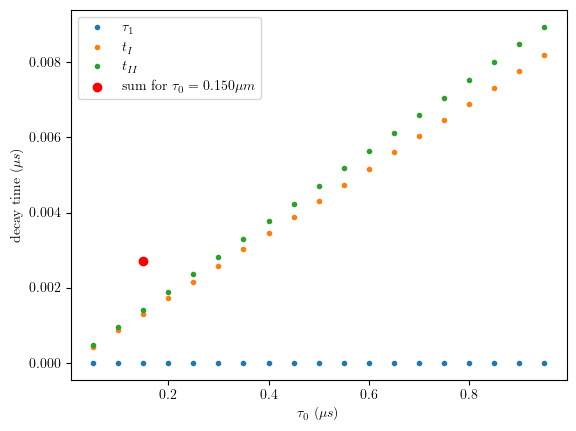

In [14]:
plt.plot(tau0,tau1,ls=' ',marker='.',label=r'$\tau_1$')
plt.plot(tau0,tI,ls=' ',marker='.',label=r'$t_I$')
plt.plot(tau0,tII,ls=' ',marker='.',label=r'$t_{II}$')
i=2
plt.scatter(tau0[i],tau1[i]+tI[i]+taus[i],c='r',label=r'sum for $\tau_0=0.150\mu m$')
plt.xlabel(r'$\tau_0\ (\mu s)$')
plt.ylabel(r'decay time $(\mu s)$')
plt.legend()

In [6]:

50*np.sqrt(2*consts.k_B*Tc/(np.pi*Delta))

30.00329385121715